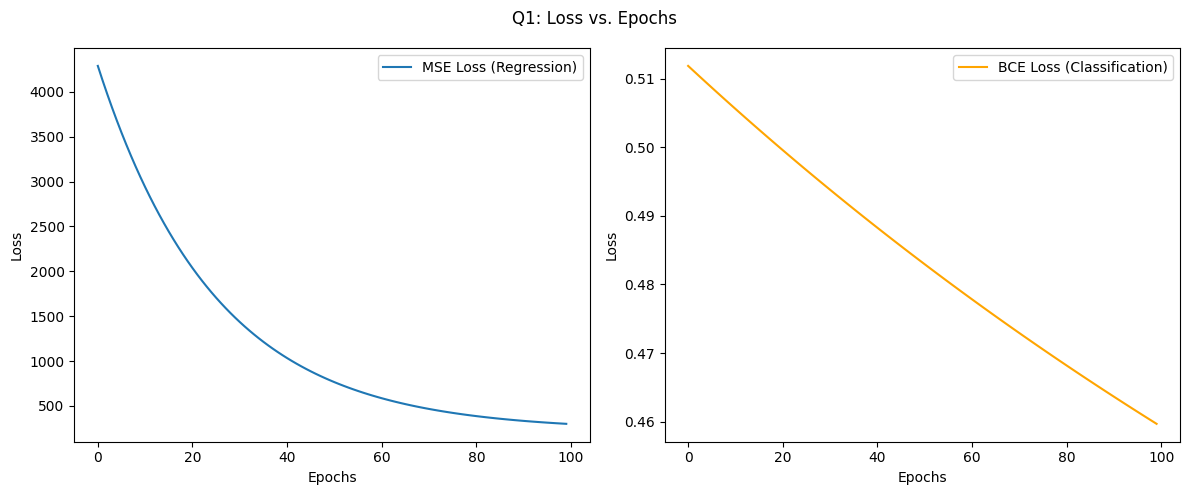

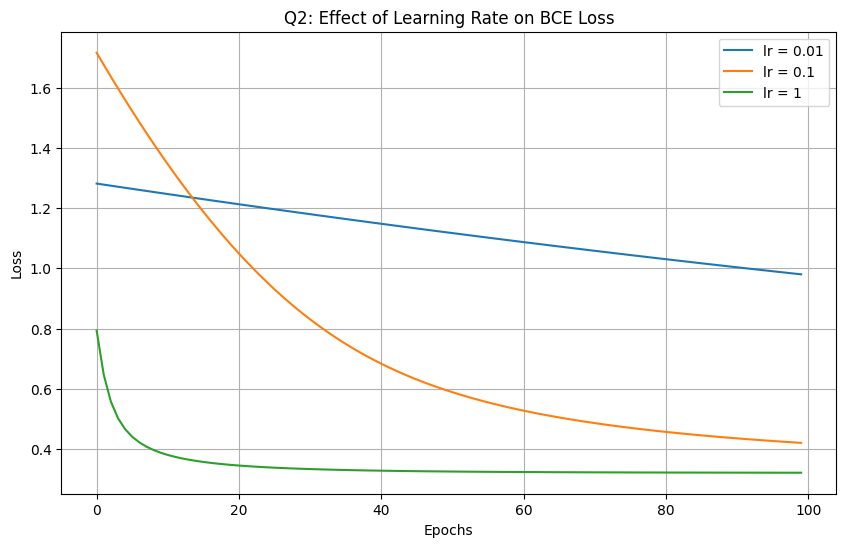


Observations:
- Lower learning rate (0.01) results in slow but stable convergence.
- Moderate rate (0.1) converges faster and more efficiently.
- High learning rate (1) causes unstable training or even divergence.



In [1]:
# Neural Network Loss and Learning Rate Comparison (Google Colab Ready)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

### Q1: Compare Loss Functions ###

# ----------- Regression with MSE Loss -----------
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=15)
y_reg = y_reg.reshape(-1, 1)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Normalize input
scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

# Initialize weights
w = np.random.randn(1, 1)
b = np.zeros((1,))

lr = 0.01
epochs = 100
mse_losses = []

# Train using gradient descent
for epoch in range(epochs):
    z = np.dot(X_train_r, w) + b
    loss = np.mean((z - y_train_r) ** 2)
    mse_losses.append(loss)
    grad_w = 2 * np.dot(X_train_r.T, (z - y_train_r)) / len(X_train_r)
    grad_b = 2 * np.mean(z - y_train_r)
    w -= lr * grad_w
    b -= lr * grad_b

# ----------- Classification with BCE Loss -----------
X_clf, y_clf = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
y_clf = y_clf.reshape(-1, 1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

# Initialize weights
w = np.random.randn(2, 1)
b = np.zeros((1,))

lr = 0.01
bce_losses = []

# Train using gradient descent
for epoch in range(epochs):
    z = np.dot(X_train_c, w) + b
    y_pred = sigmoid(z)
    loss = -np.mean(y_train_c * np.log(y_pred + 1e-8) + (1 - y_train_c) * np.log(1 - y_pred + 1e-8))
    bce_losses.append(loss)
    grad_w = np.dot(X_train_c.T, (y_pred - y_train_c)) / len(X_train_c)
    grad_b = np.mean(y_pred - y_train_c)
    w -= lr * grad_w
    b -= lr * grad_b

# ----------- Plotting Q1 -----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mse_losses, label='MSE Loss (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bce_losses, label='BCE Loss (Classification)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Q1: Loss vs. Epochs")
plt.tight_layout()
plt.show()


### Q2: Compare Learning Rate Effects ###

learning_rates = [0.01, 0.1, 1]
epochs = 100

X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
y = y.reshape(-1, 1)
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    w = np.random.randn(2, 1)
    b = np.zeros((1,))
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        losses.append(loss)
        grad_w = np.dot(X.T, (y_pred - y)) / len(X)
        grad_b = np.mean(y_pred - y)
        w -= lr * grad_w
        b -= lr * grad_b
    plt.plot(losses, label=f"lr = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Q2: Effect of Learning Rate on BCE Loss")
plt.legend()
plt.grid(True)
plt.show()

# Observations
print("""
Observations:
- Lower learning rate (0.01) results in slow but stable convergence.
- Moderate rate (0.1) converges faster and more efficiently.
- High learning rate (1) causes unstable training or even divergence.
""")
